In [117]:
"""
maximum availible volume to pool into
"""
max_volume=500

"""
maximum availible volume to be taken out of well
"""
max_oligo_volume=80

"""
maximum availible volume to be taken out of well
"""
min_oligo_volume=5

# """
# target moles of oligo pmol
# """
# target_quantity=90

In [118]:
# !pip install google-colab


In [119]:
EXPERIMENT_NAME = "OVFF364"
# reading file
import pandas as pd
df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
df_calculated =  pd.read_csv(f'./content/{EXPERIMENT_NAME}_calculated.csv', delimiter='\t', decimal=".")

df = df.merge(df_calculated, on='where')

df.to_csv(f'./content/{EXPERIMENT_NAME}_merged_input.csv', encoding='UTF8')

In [120]:
df["pM/mkl"] = 1000*df['Nucleic Acid(ng/uL)']/df['monoisotopic_mass']
df=df.dropna()

# if target_quantity/min(df["pM/mkl"]) > 70:
#   print("ATTENTION! target quantity cannot be achieved - oligo concentration is too low!")
#   target_quantity=min(df["pM/mkl"])*30
#   print(f"target_quantity is set to {target_quantity:.2f} pmol instead.")

# df['mkl']=target_quantity/df["pM/mkl"]

# # if sum(df['mkl']) > 500 mkl:
# # if min(df['mkl']) < 0.2 mkl:

# df = df[df['seq'].notna()]
# volume_list = df['mkl'].to_list()

In [121]:
pool_1 = "p03_F1-"
pool_2 = "p03_F2-"
pool_3 = "p10_F1-"
pool_4 = "p10_F2-"

POOL_NAME=pool_4

df = df[df["Name"].str.contains(f'^{POOL_NAME}\d+')]
df

,where,Name,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl
122,K8,p10_F2-1,5/31/2023 13:32,Sample 123,2635.291,1.744,1.625,79.857,45.781,33,340,-0.862,p10_F2-1,#= 50,GGG TCT GAC TAC TCC CCT GCG TGA ACT GGT CGA AG...,15400.84,171.113459
123,L8,p10_F2-2,5/31/2023 13:33,Sample 124,2439.042,1.829,1.464,73.910,40.417,33,340,-1.070,p10_F2-2,#= 48,AGG AGT CGA GCT GAT AAG TTT AAT TTT GCC AGC GC...,14806.53,164.727455
124,M8,p10_F2-3,5/31/2023 13:34,Sample 125,3107.539,1.676,1.536,94.168,56.190,33,340,-0.907,p10_F2-3,#= 65,AAA TTA AAC TTA TCA GCT CGA CTC CTA CTT TGG CT...,19833.70,156.679742
125,N8,p10_F2-4,5/31/2023 13:34,Sample 126,3475.261,2.047,1.395,105.311,51.449,33,340,-0.953,p10_F2-4,#= 56,ATC TTC CGA AGA GTA GCG GCG ATA GGA GCG GAT AA...,17454.23,199.107093
126,O8,p10_F2-5,5/31/2023 13:35,Sample 127,2650.782,1.790,1.586,80.327,44.869,33,340,-1.104,p10_F2-5,#= 48,GCC GCT ACT CTT CGG AAG ATG GGA TGC AGC CGA TT...,14790.48,179.222175
127,P8,p10_F2-6,5/31/2023 13:35,Sample 128,2956.583,1.852,1.535,89.593,48.367,33,340,-1.532,p10_F2-6,#= 41,GCG TCC TGC CAT CTG CTT ATA CTC AAT AAC GGG AA...,12536.06,235.846271
128,A9,p10_F2-7,5/31/2023 13:36,Sample 129,3884.774,1.860,1.501,117.720,63.306,33,340,-0.594,p10_F2-7,#= 47,TAA GCA GAT GGC AGG ACG CGC AGG GCG CCC TCG TC...,14475.28,268.372978
129,B9,p10_F2-8,5/31/2023 13:37,Sample 130,2435.106,1.889,1.436,73.791,39.064,33,340,-1.012,p10_F2-8,#= 47,AGC TCT TTG CCA CCA AAA CAG CCT CGC CGT ATG GG...,14458.29,168.422822
130,C9,p10_F2-9,5/31/2023 13:37,Sample 131,2460.017,1.811,1.599,74.546,41.172,33,340,-0.856,p10_F2-9,#= 53,CTG TTT TGG TGG CAA AGA GCT ATG AAG AGT TCG TG...,16389.52,150.096952
131,D9,p10_F2-10,5/31/2023 13:38,Sample 132,3471.636,1.937,1.338,105.201,54.298,33,340,-0.952,p10_F2-10,#= 64,TCC AAG CTT ACT CCA GAT GTC TTC CGC GTC AGC TT...,19607.61,177.055541


Text(0, 0.5, 'occurencies')

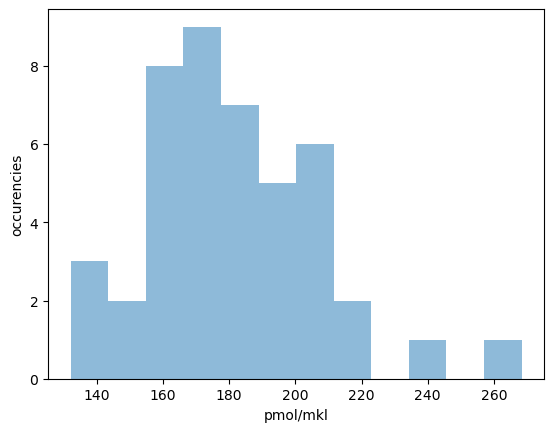

In [122]:
"""
смотрим распределение по корзинам
"""
ax = df['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [123]:
'''
определяем выбросы
'''
import pandas
import numpy as np
from scipy import stats

# %reload_ext google.colab.data_table

df['score'] = np.abs(stats.zscore(df['pM/mkl']))<1.8
# df[(np.abs(stats.zscore(df)) < 1.5).all(axis=1)]
filtered, filtered_off = (df[(np.abs(stats.zscore(df['pM/mkl'])) < 1.8)], df[(np.abs(stats.zscore(df['pM/mkl'])) >= 1.8)])
filtered_off

,where,Name,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score
127,P8,p10_F2-6,5/31/2023 13:35,Sample 128,2956.583,1.852,1.535,89.593,48.367,33,340,-1.532,p10_F2-6,#= 41,GCG TCC TGC CAT CTG CTT ATA CTC AAT AAC GGG AA...,12536.06,235.846271,False
128,A9,p10_F2-7,5/31/2023 13:36,Sample 129,3884.774,1.860,1.501,117.720,63.306,33,340,-0.594,p10_F2-7,#= 47,TAA GCA GAT GGC AGG ACG CGC AGG GCG CCC TCG TC...,14475.28,268.372978,False
149,F10,p10_F2-28,5/31/2023 13:50,Sample 150,2317.238,1.871,1.404,70.219,37.531,33,340,-1.027,p10_F2-28,#= 57,AGG CAA ATT TCG TTT TCG GAC TTT TCA TGA ATC CA...,17542.27,132.094535,False


Text(0, 0.5, 'occurencies')

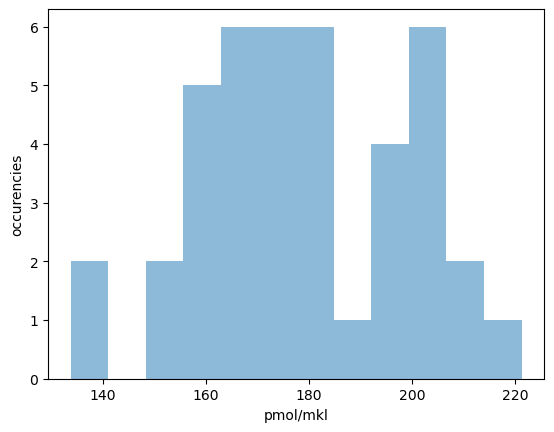

In [124]:
"""
смотрим распределение по корзинам
"""
ax = filtered['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [125]:
"""
split into 7 bins by quantiles
"""
labels=["1", "2", "3", "4", "5", "6", "7"]
filtered["quantile"] = pd.qcut(df['pM/mkl'], q=[0, 0.05, 0.1, 0.35, 0.55, 0.9, 0.95, 1], labels=labels)

'''
выравниваем группы концентраций в пределах отличия в 1.5 раз
'''
for i in labels:
  filtered.loc[filtered['quantile'] == i, ['mkl']] = round(5*7/int(i))

"""
пересчитываем моли
"""
filtered['pmol'] = filtered['mkl']*filtered['pM/mkl']
median_conc = round(filtered['pM/mkl'].median())
median_moles_in_pool = round(filtered['pmol'].median())
# print(filtered.sort_values('pM/mkl'))
print(f"equalized result: median_moles_in_pool = {median_moles_in_pool}")
filtered

equalized result: median_moles_in_pool = 1566


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,where,Name,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,...,Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score,quantile,mkl,pmol
122,K8,p10_F2-1,5/31/2023 13:32,Sample 123,2635.291,1.744,1.625,79.857,45.781,33,...,-0.862,p10_F2-1,#= 50,GGG TCT GAC TAC TCC CCT GCG TGA ACT GGT CGA AG...,15400.84,171.113459,True,4,9.0,1540.021129
123,L8,p10_F2-2,5/31/2023 13:33,Sample 124,2439.042,1.829,1.464,73.910,40.417,33,...,-1.070,p10_F2-2,#= 48,AGG AGT CGA GCT GAT AAG TTT AAT TTT GCC AGC GC...,14806.53,164.727455,True,3,12.0,1976.729457
124,M8,p10_F2-3,5/31/2023 13:34,Sample 125,3107.539,1.676,1.536,94.168,56.190,33,...,-0.907,p10_F2-3,#= 65,AAA TTA AAC TTA TCA GCT CGA CTC CTA CTT TGG CT...,19833.70,156.679742,True,3,12.0,1880.156905
125,N8,p10_F2-4,5/31/2023 13:34,Sample 126,3475.261,2.047,1.395,105.311,51.449,33,...,-0.953,p10_F2-4,#= 56,ATC TTC CGA AGA GTA GCG GCG ATA GGA GCG GAT AA...,17454.23,199.107093,True,5,7.0,1393.749653
126,O8,p10_F2-5,5/31/2023 13:35,Sample 127,2650.782,1.790,1.586,80.327,44.869,33,...,-1.104,p10_F2-5,#= 48,GCC GCT ACT CTT CGG AAG ATG GGA TGC AGC CGA TT...,14790.48,179.222175,True,4,9.0,1612.999578
129,B9,p10_F2-8,5/31/2023 13:37,Sample 130,2435.106,1.889,1.436,73.791,39.064,33,...,-1.012,p10_F2-8,#= 47,AGC TCT TTG CCA CCA AAA CAG CCT CGC CGT ATG GG...,14458.29,168.422822,True,3,12.0,2021.073861
130,C9,p10_F2-9,5/31/2023 13:37,Sample 131,2460.017,1.811,1.599,74.546,41.172,33,...,-0.856,p10_F2-9,#= 53,CTG TTT TGG TGG CAA AGA GCT ATG AAG AGT TCG TG...,16389.52,150.096952,True,2,18.0,2701.745140
131,D9,p10_F2-10,5/31/2023 13:38,Sample 132,3471.636,1.937,1.338,105.201,54.298,33,...,-0.952,p10_F2-10,#= 64,TCC AAG CTT ACT CCA GAT GTC TTC CGC GTC AGC TT...,19607.61,177.055541,True,4,9.0,1593.499871
132,E9,p10_F2-11,5/31/2023 13:39,Sample 133,3370.709,1.906,1.487,102.143,53.585,33,...,-0.697,p10_F2-11,#= 54,AAG ACA TCT GGA GTA AGC TTG GAA CCG AAA ACG CC...,16678.73,202.096263,True,5,7.0,1414.673839
133,F9,p10_F2-12,5/31/2023 13:39,Sample 134,2206.437,2.060,1.311,66.862,32.452,33,...,-1.047,p10_F2-12,#= 46,TGC GCG CAA AAC CAT TAG AGA TCG TAC TCA AAA CA...,14145.14,155.985519,True,3,12.0,1871.826224


In [126]:
filtered_off['mkl'] = median_moles_in_pool/filtered_off['pM/mkl']
filtered_off.loc[filtered_off['mkl'] >= max_oligo_volume, ['mkl']] = max_oligo_volume
filtered_off.loc[filtered_off['mkl'] <= min_oligo_volume, ['mkl']] = min_oligo_volume
filtered_off['mkl'] = round(filtered_off['mkl'])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,where,Name,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score,mkl
127,P8,p10_F2-6,5/31/2023 13:35,Sample 128,2956.583,1.852,1.535,89.593,48.367,33,340,-1.532,p10_F2-6,#= 41,GCG TCC TGC CAT CTG CTT ATA CTC AAT AAC GGG AA...,12536.06,235.846271,False,7.0
128,A9,p10_F2-7,5/31/2023 13:36,Sample 129,3884.774,1.860,1.501,117.720,63.306,33,340,-0.594,p10_F2-7,#= 47,TAA GCA GAT GGC AGG ACG CGC AGG GCG CCC TCG TC...,14475.28,268.372978,False,6.0
149,F10,p10_F2-28,5/31/2023 13:50,Sample 150,2317.238,1.871,1.404,70.219,37.531,33,340,-1.027,p10_F2-28,#= 57,AGG CAA ATT TCG TTT TCG GAC TTT TCA TGA ATC CA...,17542.27,132.094535,False,12.0


In [127]:
"""
FINAL CONCATENATION AND VOLUME ASSERTION TEST
"""
result = pd.concat([filtered_off, filtered])
result['pmol'] = result['mkl']*result['pM/mkl']
total = result['mkl'].sum()
result['final conc, pmol/mkl'] = round(result['pmol']/total, 2)
print(f"calculated total volume of pool: {total} mkl")
# assert total < total_volume, "max volume exceeded"

'''
если пул больше max_volume (500 мкл) - разбиваем на столько пробирок, сколько потребуется
'''
pool_index_list = []
sum = 0
for i in result['mkl']:
  sum+=i
  pool_index_list+=[round(1+sum//max_volume)]

result['target_well'] = pool_index_list

'''
проверяем, что у нас нет разницы концентраций на порядок
'''
assert min(result['final conc, pmol/mkl'])*10 > max(result['final conc, pmol/mkl']), "разброс концентраций превышает 1 порядок!!!\nЭто непорядок!!!"
"""
если все хорошо - идем дальше
"""
result.sort_index(inplace=True)
result
print(f"разбито на {max(pool_index_list)} пробирки(ок)")

calculated total volume of pool: 457.0 mkl
разбито на 1 пробирки(ок)


In [128]:
"""
FINALWORKLIST EXPORT
"""
volume_list = round(result['mkl'], 0).astype(int)


"""
читаем файл из програмы Глеба
"""
worklist_df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_worklist.csv', delimiter=',', header=None)
worklist_df.reset_index(drop=True)
# drop NaN seq
worklist_df[4] = volume_list
worklist_df[4] = worklist_df[4]
worklist_df[4]
worklist_df[3] = pool_index_list

"""
экспортируем новый worklist
"""
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist.csv', encoding='UTF8')

final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
total_volume=worklist_df[4].sum()


print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
print(f"total_volume = {total_volume:.1f} mkl")
print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

ValueError: Length of values (44) does not match length of index (150)

In [129]:
volume_list = round(result['mkl'], 0).astype(int)
number_of_wells = len(volume_list)

def coordinate_to_number_parser(list_of_coords):
    '''
    переводит координату на плашке из формата A1 в порядковый номер
    '''
    index_list = []
    for i in list_of_coords: 
        
        row = ord(i[0]) - 64
        column = int(i[1:])
        index_list += [16*(column-1)+row]
    
    return index_list

list_of_indexes = coordinate_to_number_parser(result["where"].to_list())

col1 = ["384well"]*number_of_wells
col2 = list_of_indexes
col3 = ["96well"]*number_of_wells
col4 = pool_index_list
col5 = volume_list.to_list()

list_of_lists = [col1, col2, col3, col4, col5]


In [130]:
exported_df = pd.DataFrame(list_of_lists)
exported_df = exported_df.reset_index(drop=True)
exported_df = exported_df.T

"""
экспортируем новый worklist
"""
exported_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist_{POOL_NAME}.csv', encoding='UTF8', header=None, index=False)

final_equalized_oligo_concentration=median_moles_in_pool/exported_df[4].sum()
total_volume=exported_df[4].sum()


Text(0, 0.5, 'occurencies')

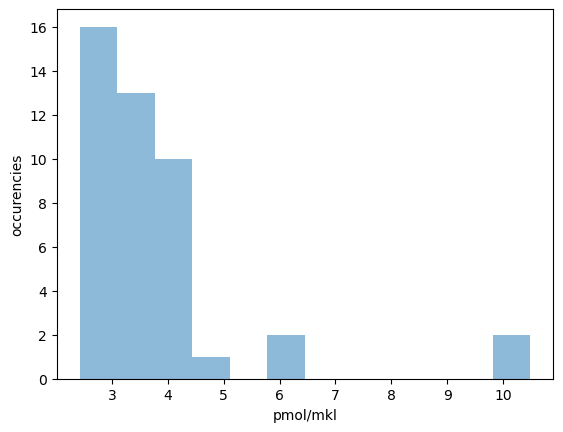

In [131]:
"""
смотрим распределение по корзинам
"""
ax = result['final conc, pmol/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [132]:
"""
Сравниваем 4 эксперимента - с выравниванием и без + эти два с очисткой на магнитных частицах
Как сравнивать? 
Можно ли одновременно на риалтаймнике?
"""

'\nСравниваем 4 эксперимента - с выравниванием и без + эти два с очисткой на магнитных частицах\nКак сравнивать? \nМожно ли одновременно на риалтаймнике?\n'

In [133]:
result

,where,Name,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,...,length,seq,monoisotopic_mass,pM/mkl,score,mkl,quantile,pmol,"final conc, pmol/mkl",target_well
122,K8,p10_F2-1,5/31/2023 13:32,Sample 123,2635.291,1.744,1.625,79.857,45.781,33,...,#= 50,GGG TCT GAC TAC TCC CCT GCG TGA ACT GGT CGA AG...,15400.84,171.113459,True,9.0,4,1540.021129,3.37,1
123,L8,p10_F2-2,5/31/2023 13:33,Sample 124,2439.042,1.829,1.464,73.910,40.417,33,...,#= 48,AGG AGT CGA GCT GAT AAG TTT AAT TTT GCC AGC GC...,14806.53,164.727455,True,12.0,3,1976.729457,4.33,1
124,M8,p10_F2-3,5/31/2023 13:34,Sample 125,3107.539,1.676,1.536,94.168,56.190,33,...,#= 65,AAA TTA AAC TTA TCA GCT CGA CTC CTA CTT TGG CT...,19833.70,156.679742,True,12.0,3,1880.156905,4.11,1
125,N8,p10_F2-4,5/31/2023 13:34,Sample 126,3475.261,2.047,1.395,105.311,51.449,33,...,#= 56,ATC TTC CGA AGA GTA GCG GCG ATA GGA GCG GAT AA...,17454.23,199.107093,True,7.0,5,1393.749653,3.05,1
126,O8,p10_F2-5,5/31/2023 13:35,Sample 127,2650.782,1.790,1.586,80.327,44.869,33,...,#= 48,GCC GCT ACT CTT CGG AAG ATG GGA TGC AGC CGA TT...,14790.48,179.222175,True,9.0,4,1612.999578,3.53,1
127,P8,p10_F2-6,5/31/2023 13:35,Sample 128,2956.583,1.852,1.535,89.593,48.367,33,...,#= 41,GCG TCC TGC CAT CTG CTT ATA CTC AAT AAC GGG AA...,12536.06,235.846271,False,7.0,NaN,1650.923895,3.61,1
128,A9,p10_F2-7,5/31/2023 13:36,Sample 129,3884.774,1.860,1.501,117.720,63.306,33,...,#= 47,TAA GCA GAT GGC AGG ACG CGC AGG GCG CCC TCG TC...,14475.28,268.372978,False,6.0,NaN,1610.237868,3.52,1
129,B9,p10_F2-8,5/31/2023 13:37,Sample 130,2435.106,1.889,1.436,73.791,39.064,33,...,#= 47,AGC TCT TTG CCA CCA AAA CAG CCT CGC CGT ATG GG...,14458.29,168.422822,True,12.0,3,2021.073861,4.42,1
130,C9,p10_F2-9,5/31/2023 13:37,Sample 131,2460.017,1.811,1.599,74.546,41.172,33,...,#= 53,CTG TTT TGG TGG CAA AGA GCT ATG AAG AGT TCG TG...,16389.52,150.096952,True,18.0,2,2701.745140,5.91,1
131,D9,p10_F2-10,5/31/2023 13:38,Sample 132,3471.636,1.937,1.338,105.201,54.298,33,...,#= 64,TCC AAG CTT ACT CCA GAT GTC TTC CGC GTC AGC TT...,19607.61,177.055541,True,9.0,4,1593.499871,3.49,1
